Celem zadania jest obserwacja wpływu kompresji Condensed Nearest Neighbours, w skrócie CNN.

In [1]:
!pip install webcolors

In [2]:
!pip install imblearn

    100% |████████████████████████████████| 174kB 6.4MB/s 
    100% |████████████████████████████████| 5.3MB 5.1MB/s 
  Found existing installation: scikit-learn 0.19.2
    Uninstalling scikit-learn-0.19.2:
      Successfully uninstalled scikit-learn-0.19.2


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from PIL import Image
from sklearn.neighbors import KNeighborsClassifier
from imblearn.under_sampling import CondensedNearestNeighbour
from matplotlib.colors import ListedColormap
from pandas.core.frame import DataFrame
from typing import Dict, Tuple

In [0]:
dataset_image_1 = "dataset_picture1.png"
dataset_image_2 = "dataset_picture2.png"
dataset_image_3 = "dataset_picture3.png"

In [0]:
rgb_code_dictionary={(255,255,255): -1, (0,0,0):0, (255,0,0):1, (0,255,0):2, (0,0,255):3 }

def distance(c1, c2):
    (r1,g1,b1) = c1
    (r2,g2,b2) = c2
    return math.sqrt((r1 - r2)**2 + (g1 - g2) ** 2 + (b1 - b2) **2)
def get_closest(point):
  colors = list(rgb_code_dictionary.keys())
  closest_colors = sorted(colors, key=lambda color: distance(color, point))
  closest_color = closest_colors[0]
  code = rgb_code_dictionary[closest_color]
  return code

In [0]:
import math

In [0]:
def add_noise(X):
  rand = random.gauss(0, 1)
  return X + rand

def divide_dataset(X):
  np.random.shuffle(X)
  training, test = X[:math.floor(0.7*X.shape[0]),:], X[math.floor(0.7*X.shape[0]):,:]
  return training, test
  

In [0]:
def write_data_to_csv(source: str, dest_path: str):
    image = Image.open(source)
    width, height = image.size
    with open(dest_path, 'w') as dest_file:
        for x in range(0, width):
            for y in range(0, height):
              if(get_closest(image.getpixel((x,y))[0:3])!=-1):
                dest_file.write(f'{add_noise(x)};{add_noise(y)};{get_closest(image.getpixel((x,y))[0:3])}\n')


In [0]:
write_data_to_csv(dataset_image_1, "dataset_1.csv")
write_data_to_csv(dataset_image_2, "dataset_2.csv")
write_data_to_csv(dataset_image_3, "dataset_3.csv")

In [0]:
dataset1 = 'dataset_1.csv'
dataset2 = 'dataset_2.csv'
dataset3 = 'dataset_3.csv'

In [0]:
def read_dataset_from_csv(dataset):
  dataset_df = pd.read_csv(dataset, sep=';', names=['x', 'y', 'label'])
  X = dataset_df.iloc[:, 0:2]
  y = dataset_df.iloc[:, 2]
  return(X,y)

In [0]:
def calculate_decision_boundry(X, y,X_test,y_test,k,weights,metric,cmap_light,cmap_bold,**kwargs ):
  
  clf = KNeighborsClassifier(k, weights=weights, metric=metric, **kwargs)
  clf.fit(X, y)

  h = 0.1
  
  #Check correctness of clasification
  Q = clf.predict(X_test)
  accuracy = np.sum(Q == y_test)/y_test.size
  print("Accuracy: {}".format(accuracy))

  # Plot the decision boundary. For that, we will assign a color to each
  # point in the mesh [x_min, x_max]x[y_min, y_max].
  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

  # Put the result into a color plot
  Z = Z.reshape(xx.shape)
  plt.figure()
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

  # Plot also the training points
  plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())
  plt.gca().invert_yaxis()
  plt.xlabel("picture x coordinates")
  plt.ylabel("picture y coordinates")

  plt.title("{}-Class classification (k = {}, weights = {}, metric = {})".format(cmap_bold.N, k, weights, metric))

In [0]:
X, y = read_dataset_from_csv(dataset1)
training_, test_ = divide_dataset(np.c_[X, y])
X, y = training_[:,:2], training_[:,2]
X_test, y_test = test_[:,:2], test_[:,2]


In [0]:
cmap_light = ListedColormap(['#DCDCDC','#FFC0CB'])
cmap_bold = ListedColormap(['#000000','#FF0000'])

Accuracy: 0.8938144329896908


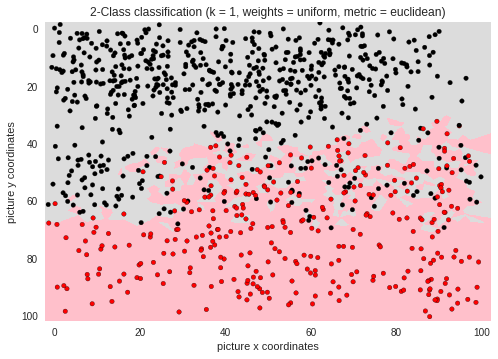

In [35]:
calculate_decision_boundry(X, y,X_test,y_test, 1, 'uniform', 'euclidean',cmap_light,cmap_bold)

In [0]:
k = 1
cnn = CondensedNearestNeighbour(n_neighbors=k, sampling_strategy='all')
X_train, y_train = cnn.fit_resample(X, y)
print(y_train.size/y_train)

Accuracy: 0.7051546391752578


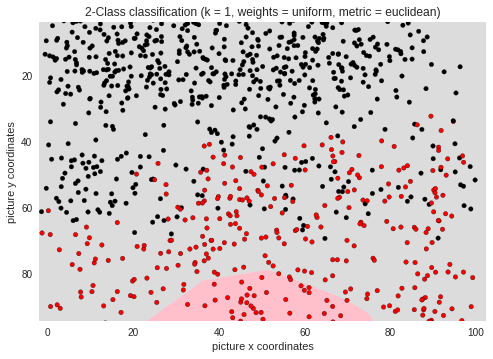

In [42]:
calculate_decision_boundry(X_train, y_train,X_test,y_test, 1, 'uniform', 'euclidean',cmap_light,cmap_bold)

Accuracy: 0.8958762886597939


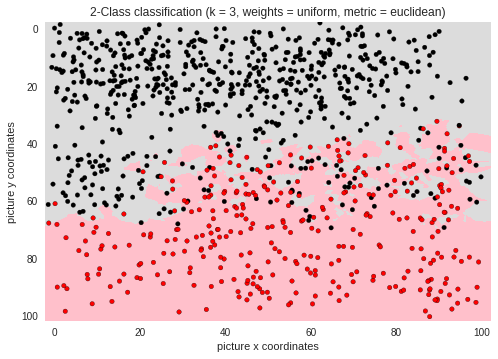

In [45]:
calculate_decision_boundry(X, y, X_test,y_test, 3, 'uniform', 'euclidean',cmap_light,cmap_bold)

In [0]:
k = 3
cnn = CondensedNearestNeighbour(n_neighbors=k, sampling_strategy='all')
X_train, y_train = cnn.fit_resample(X, y)
print(y_train.size/y_train)

Accuracy: 0.6618556701030928


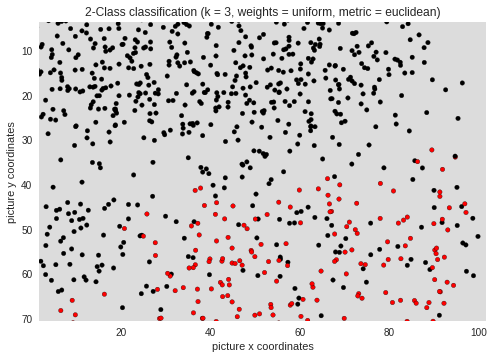

In [52]:
calculate_decision_boundry(X_train, y_train, X_test,y_test, 3, 'uniform', 'euclidean',cmap_light,cmap_bold)

In [0]:
X, y = read_dataset_from_csv(dataset2)
training_, test_ = divide_dataset(np.c_[X, y])
X, y = training_[:,:2], training_[:,2]
X_test, y_test = test_[:,:2], test_[:,2]

In [0]:
cmap_light = ListedColormap(['#FFC0CB',  '#00FF7F', '#87CEEB'])
cmap_bold = ListedColormap([ '#FF0000', '#00FF00','#0000FF'])

Accuracy: 0.9764890282131662


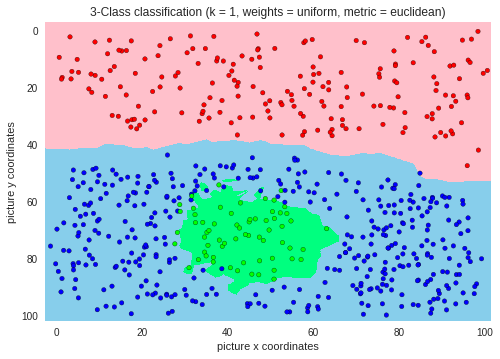

In [55]:
calculate_decision_boundry(X, y,X_test,y_test, 1, 'uniform', 'euclidean',cmap_light,cmap_bold)

In [0]:
k = 1
cnn = CondensedNearestNeighbour(n_neighbors=k, sampling_strategy='all')
X_train, y_train = cnn.fit_resample(X, y)
print(y_train.size/y_train)

Accuracy: 0.9153605015673981


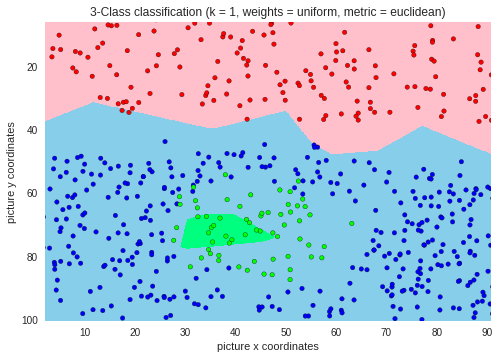

In [57]:
calculate_decision_boundry(X_train, y_train, X_test,y_test, 1, 'uniform', 'euclidean',cmap_light,cmap_bold)

Accuracy: 0.9811912225705329


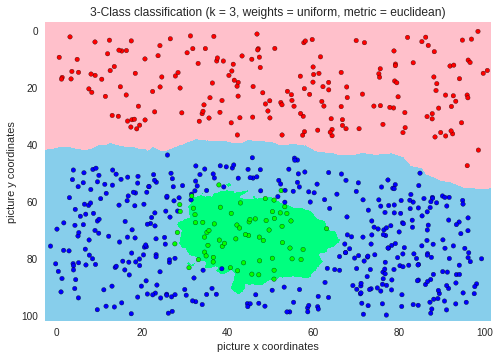

In [58]:
calculate_decision_boundry(X, y, X_test,y_test, 3, 'uniform', 'euclidean',cmap_light,cmap_bold)

In [0]:
k = 3
cnn = CondensedNearestNeighbour(n_neighbors=k, sampling_strategy='all')
X_train, y_train = cnn.fit_resample(X, y)
print(y_train.size/y_train)

Accuracy: 0.8840125391849529


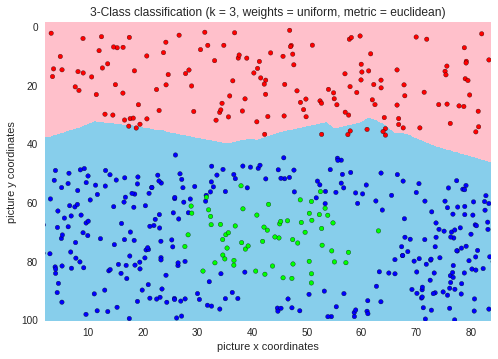

In [60]:
calculate_decision_boundry(X_train, y_train, X_test,y_test, 3, 'uniform', 'euclidean',cmap_light,cmap_bold)

In [0]:
X, y = read_dataset_from_csv(dataset3)
training_, test_ = divide_dataset(np.c_[X, y])
X, y = training_[:,:2], training_[:,2]
X_test, y_test = test_[:,:2], test_[:,2]

Accuracy: 0.9265536723163842


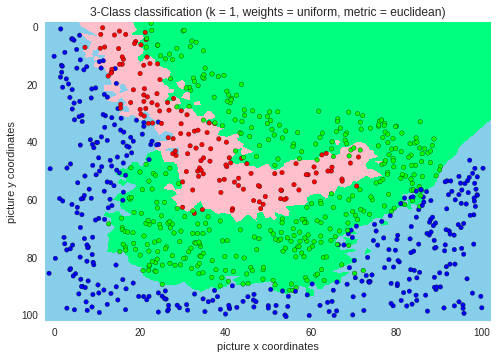

In [62]:
calculate_decision_boundry(X, y,X_test,y_test, 1, 'uniform', 'euclidean',cmap_light,cmap_bold)

In [0]:
k = 1
cnn = CondensedNearestNeighbour(n_neighbors=k, sampling_strategy='all')
X_train, y_train = cnn.fit_resample(X, y)
print(y_train.size/y_train)

Accuracy: 0.7570621468926554


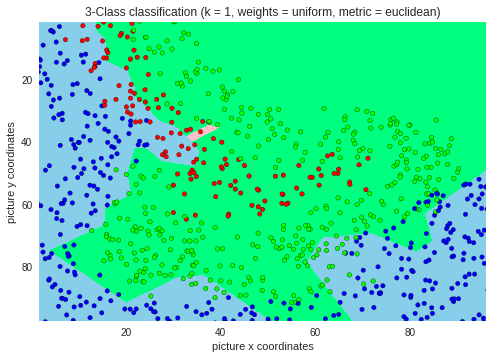

In [64]:
calculate_decision_boundry(X_train, y_train, X_test,y_test, 1, 'uniform', 'euclidean',cmap_light,cmap_bold)

Accuracy: 0.9254237288135593


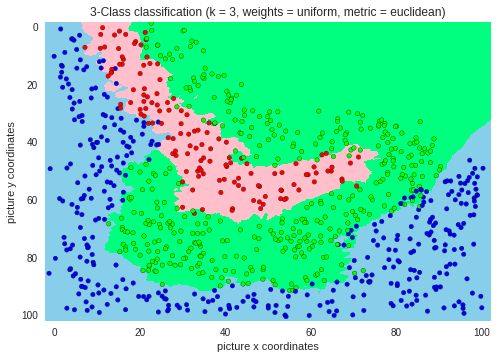

In [65]:
calculate_decision_boundry(X, y, X_test,y_test, 3, 'uniform', 'euclidean',cmap_light,cmap_bold)

In [0]:
k = 3
cnn = CondensedNearestNeighbour(n_neighbors=k, sampling_strategy='all')
X_train, y_train = cnn.fit_resample(X, y)

Accuracy: 0.7604519774011299


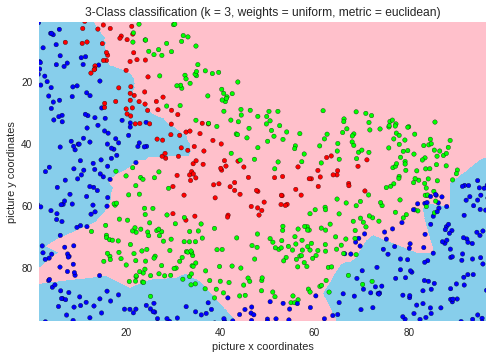

In [67]:
calculate_decision_boundry(X_train, y_train, X_test,y_test, 3, 'uniform', 'euclidean',cmap_light,cmap_bold)